# MALARIA CASES AND DEATHS - A DATA-DRIVEN ANALYSIS

## Introduction

Malaria remains one of the most pressing global health challenges, particularly in regions with limited access to healthcare resources. This dataset provides detailed information on malaria cases and deaths across multiple countries, categorized by year and WHO region.

By leveraging this data, we can gain insights into the temporal and geographical distribution of malaria, assess its impact, and identify key trends and patterns.

## Objectives

1. Trend Analysis: Analyze the yearly progression of malaria cases and deaths to identify trends or changes over time.
2. Regional Analysis: Examine the distribution of malaria cases and deaths across different WHO regions to identify high-burden areas.
3. Country-Level Insights: Highlight countries with the highest number of cases and deaths.
4. Case-Fatality Rate (CFR): Calculate and compare the CFR (deaths per reported cases) across regions.
5. Correlation Analysis: Explore potential relationships between the number of cases, and the number of deaths.

## Data Cleaning and Manipulation

I will start by importing the necessary libraries needed for this analysis, and also import the dataset for cleaning and manipulation

In [1]:
# Importing required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as plx
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
# Importing the dataset

df = pd.read_csv('reported_numbers.csv')
df.head(20)

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe
5,Azerbaijan,2017,0.0,NaN,Europe
6,Bangladesh,2017,4893.0,13.0,South-East Asia
7,Belize,2017,7.0,0.0,Americas
8,Benin,2017,1573163.0,2182.0,Africa
9,Bhutan,2017,24.0,1.0,South-East Asia


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1944 non-null   object 
 1   Year           1944 non-null   int64  
 2   No. of cases   1710 non-null   float64
 3   No. of deaths  1675 non-null   float64
 4   WHO Region     1944 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 76.1+ KB


In [4]:
len(df['Country'].unique())

108

In [5]:
df.shape

(1944, 5)

### Data Cleaning

In the data exploration stage, I noticed there are  null values in 2 columns in the dataset. I will proceed to sum the null values in individual columns and drop the null values using the _.dropna()_ function.

In [6]:
df.isnull().sum()

Country            0
Year               0
No. of cases     234
No. of deaths    269
WHO Region         0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

Country          0
Year             0
No. of cases     0
No. of deaths    0
WHO Region       0
dtype: int64

### Data Manipulation

Now that the dataset has no null values, I'll ensure each columns have the correct datatypes, and are in the appropriate format.

In [9]:
df.dtypes

Country           object
Year               int64
No. of cases     float64
No. of deaths    float64
WHO Region        object
dtype: object

In [10]:
df['No. of cases'] = df['No. of cases'].astype(int)
df['No. of deaths'] = df['No. of deaths'].astype(int)

In [11]:
df.dtypes

Country          object
Year              int64
No. of cases      int32
No. of deaths     int32
WHO Region       object
dtype: object

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
df['Country'].replace({"Bolivia (Plurinational State of)":"Bolivia", 
    "Iran (Islamic Republic of)":"Iran", 
    "CÃ´te d'Ivoire":"Cote D'Ivoire", 
    "Venezuela (Bolivarian Republic of)":"Venezuela"}, inplace=True)

## Exploratory Data Analysis (EDA)

In order to provide more insights on how severe the disease was in a particular region, I decided to calculate the Case-Fatality Rate (CFR) by finding the percentage of deaths among the reported number of cases.

In [14]:
df['CFR'] = df.apply(
    lambda row: round((row['No. of deaths'] / row['No. of cases']) * 100, 2) 
    if row['No. of cases'] > 0 else 0,
    axis=1)

In [15]:
df.head(10)

,Country,Year,No. of cases,No. of deaths,WHO Region,CFR
0,Afghanistan,2017,161778,10,Eastern Mediterranean,0.01
1,Algeria,2017,0,0,Africa,0.00
2,Angola,2017,3874892,13967,Africa,0.36
3,Argentina,2017,0,1,Americas,0.00
6,Bangladesh,2017,4893,13,South-East Asia,0.27
7,Belize,2017,7,0,Americas,0.00
8,Benin,2017,1573163,2182,Africa,0.14
9,Bhutan,2017,24,1,South-East Asia,4.17
10,Bolivia,2017,4572,0,Americas,0.00
11,Botswana,2017,1900,17,Africa,0.89


In [16]:
total_case = df['No. of cases'].sum()
total_case

619513848

A total of 619,513,848 million cases of malaria were recorded

In [17]:
total_deaths = df['No. of deaths'].sum()
total_deaths

1586810

A total of 1,586,810 deaths associated with malaria were recorded

Using the _.groupby()_ function, I'll group the data by WHO Region, Year, and Countries to be able to make visualizations and gain insights from them

In [18]:
cfr_by_region = df.groupby('WHO Region')['CFR'].mean()
cfr_by_region

WHO Region
Africa                   21.955018
Americas                  0.106329
Eastern Mediterranean     0.709211
Europe                    0.060827
South-East Asia           0.294768
Western Pacific           3.192670
Name: CFR, dtype: float64

<Axes: title={'center': 'Case-Fatality Rate per WHO Region'}, ylabel='WHO Region'>

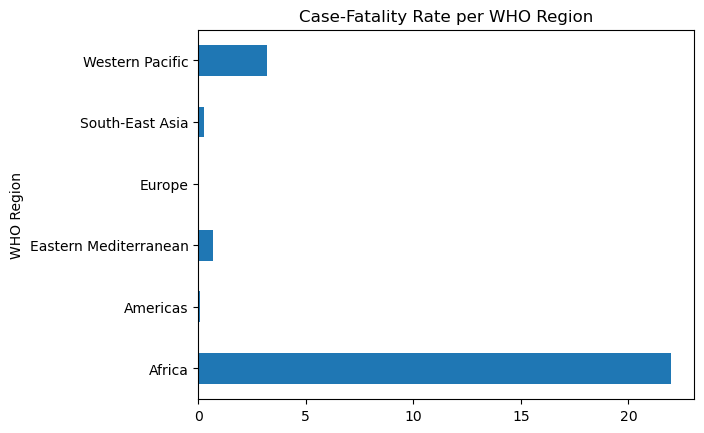

In [19]:
cfr_by_region.plot(kind='barh', title='Case-Fatality Rate per WHO Region')

In [20]:
region = df.groupby(['WHO Region'])[['No. of cases', 'No. of deaths']].sum().reset_index()
region.head()

,WHO Region,No. of cases,No. of deaths
0,Africa,545111852,1480850
1,Americas,13433321,11039
2,Eastern Mediterranean,15841260,26764
3,Europe,112675,25
4,South-East Asia,38305249,49802


In [21]:
region_case = region[['WHO Region', 'No. of cases']]
region_case

,WHO Region,No. of cases
0,Africa,545111852
1,Americas,13433321
2,Eastern Mediterranean,15841260
3,Europe,112675
4,South-East Asia,38305249
5,Western Pacific,6709491


In [22]:
# The following function allows me to print the data on the top of the bars of the chart

def data_label (axis, width, height):
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    for p in axis.patches:
        axis.annotate ("{0:.0f}".format(p.get_height()), (p.get_x()+width, p.get_height()+height))

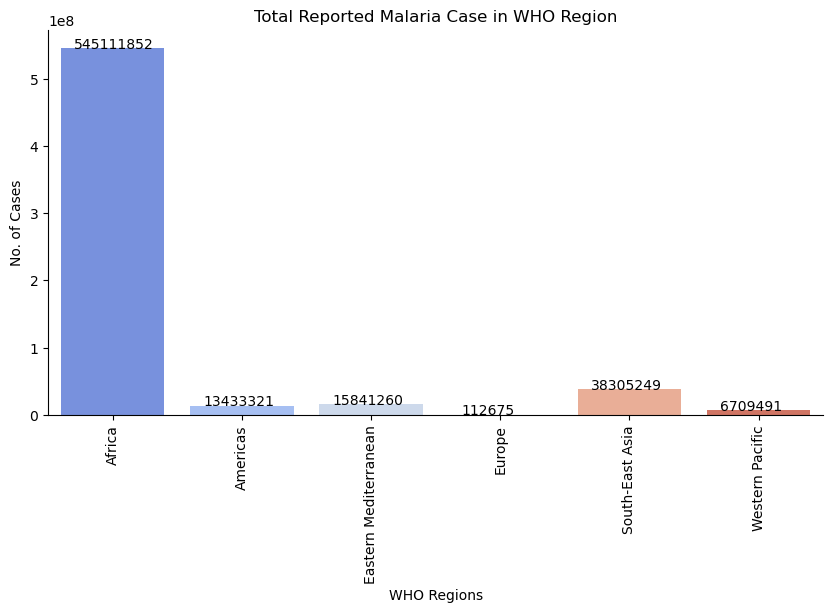

In [23]:
plt.figure(figsize = (10,5))
ax = sb.barplot(data=region_case, x='WHO Region', y='No. of cases', palette ='coolwarm')
plt.title ('Total Reported Malaria Case in WHO Region')
plt.xticks(rotation = 90)
plt.xlabel('WHO Regions')
plt.ylabel('No. of Cases')
data_label(ax,0.1,10)
plt.show()

From the visual above, Africa has the highest number of reported Malaria Cases in the world.....(545,111,852), and Europe having the lowest number of reported Malaria Cases.....(112,675).

In [24]:
region_deaths = region[['WHO Region', 'No. of deaths']]
region_deaths

,WHO Region,No. of deaths
0,Africa,1480850
1,Americas,11039
2,Eastern Mediterranean,26764
3,Europe,25
4,South-East Asia,49802
5,Western Pacific,18330


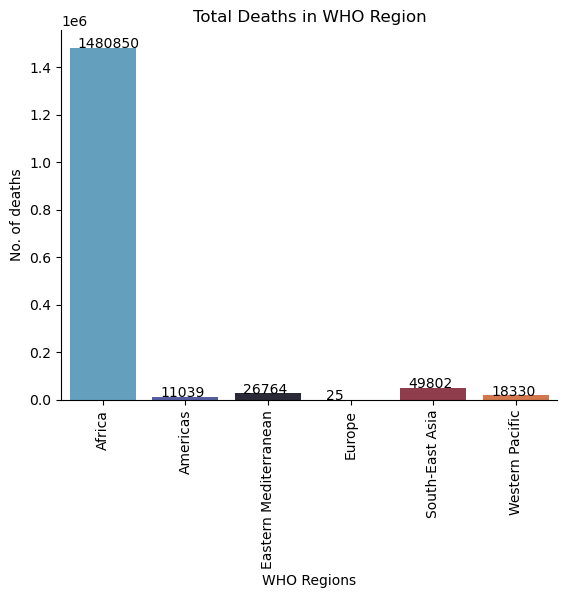

<Figure size 1000x500 with 0 Axes>

In [25]:
ax = sb.barplot(data=region_deaths, x='WHO Region', y='No. of deaths', palette ='icefire')
plt.title ('Total Deaths in WHO Region')
plt.xticks(rotation = 90)
plt.xlabel('WHO Regions')
plt.ylabel('No. of deaths')
plt.figure(figsize = (10,5))
data_label(ax,0.1,10)
plt.show()

Just like the Total Reported Malaria Cases in WHO Region, Africa also has the highest number of deaths, (1,480,850), and Europe has the lowest number of deaths, (25).

In [26]:
country = df.groupby(['Country'])[['No. of cases', 'No. of deaths']].sum().reset_index()
country.head(10)

,Country,No. of cases,No. of deaths
0,Afghanistan,1045271,363
1,Algeria,1044,4
2,Angola,26006152,125364
3,Argentina,2098,2
4,Armenia,355,0
5,Azerbaijan,4658,0
6,Bangladesh,722954,4252
7,Belize,9196,2
8,Benin,8307559,14790
9,Bhutan,31428,85


In [27]:
country_case = country[['Country', 'No. of cases']]
country_case.head(10)

,Country,No. of cases
0,Afghanistan,1045271
1,Algeria,1044
2,Angola,26006152
3,Argentina,2098
4,Armenia,355
5,Azerbaijan,4658
6,Bangladesh,722954
7,Belize,9196
8,Benin,8307559
9,Bhutan,31428


In [28]:
country_case = country_case.sort_values('No. of cases', ascending = False)

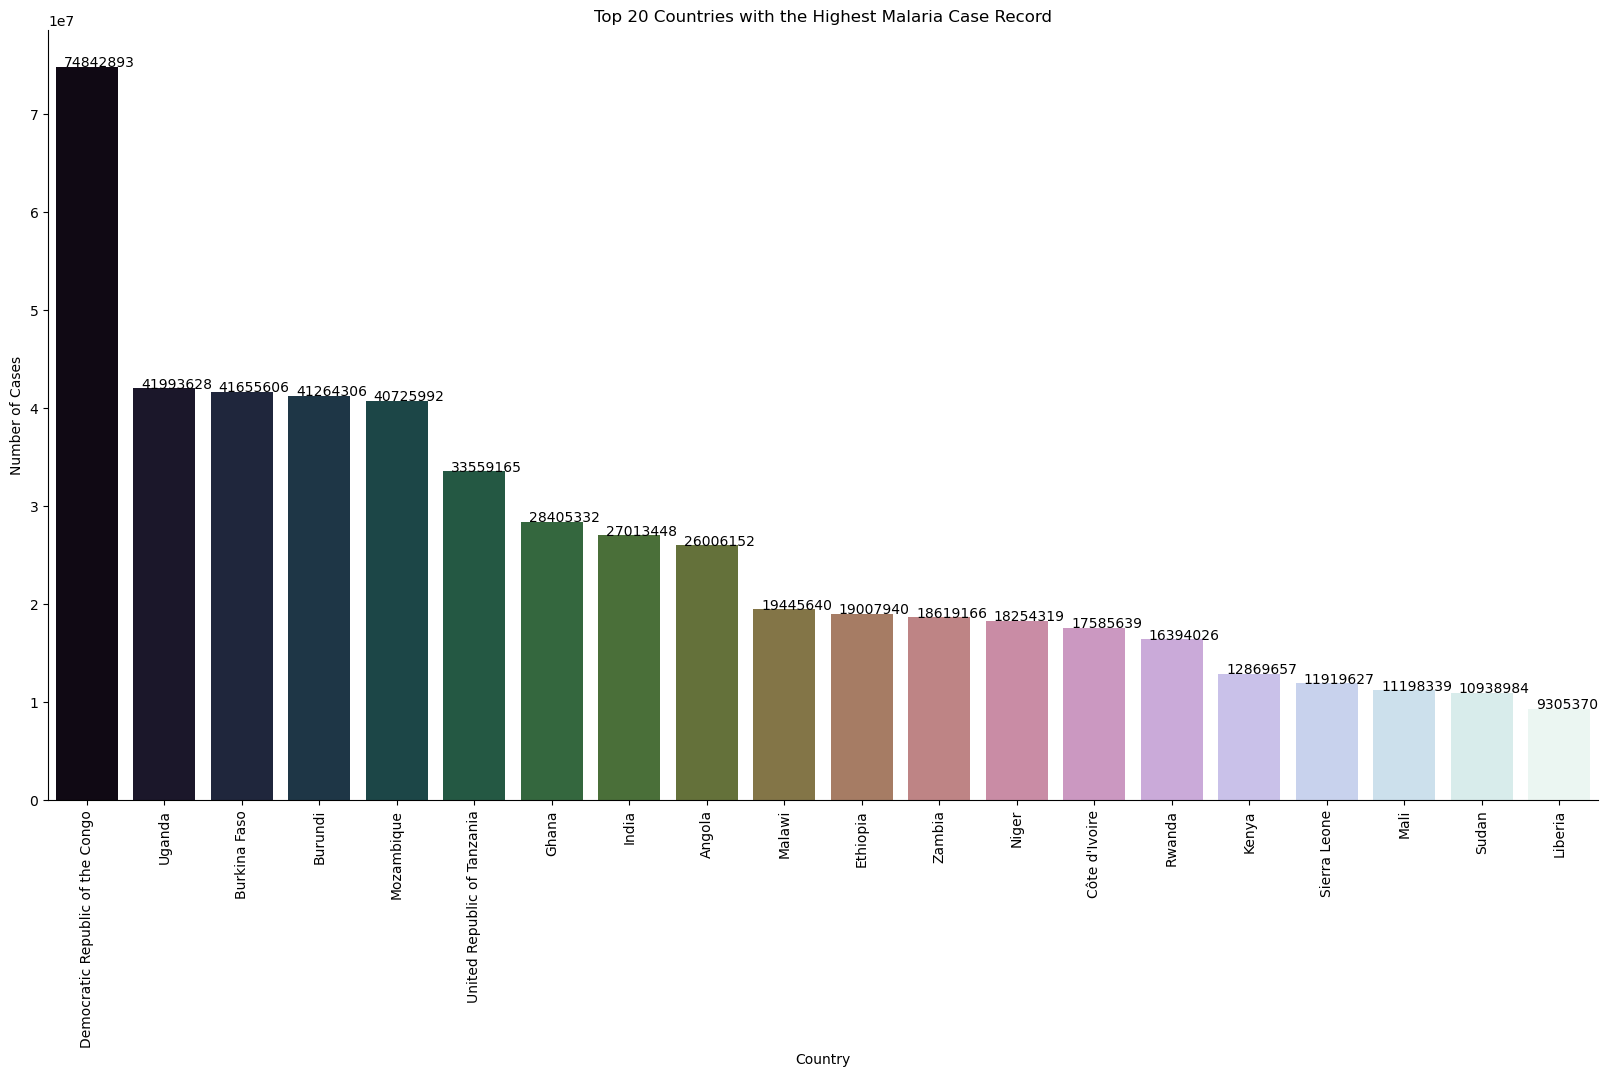

In [29]:
plt.figure(figsize = (20,10))
ax = sb.barplot(data=country_case[:20], x='Country', y='No. of cases', palette='cubehelix')
plt.title ('Top 20 Countries with the Highest Malaria Case Record')
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Number of Cases')
data_label(ax,0.1,10)
plt.show()

In [30]:
country_deaths = country[['Country', 'No. of deaths']]
country_deaths.head(10)

,Country,No. of deaths
0,Afghanistan,363
1,Algeria,4
2,Angola,125364
3,Argentina,2
4,Armenia,0
5,Azerbaijan,0
6,Bangladesh,4252
7,Belize,2
8,Benin,14790
9,Bhutan,85


In [31]:
country_deaths = country_deaths.sort_values('No. of deaths', ascending = False)

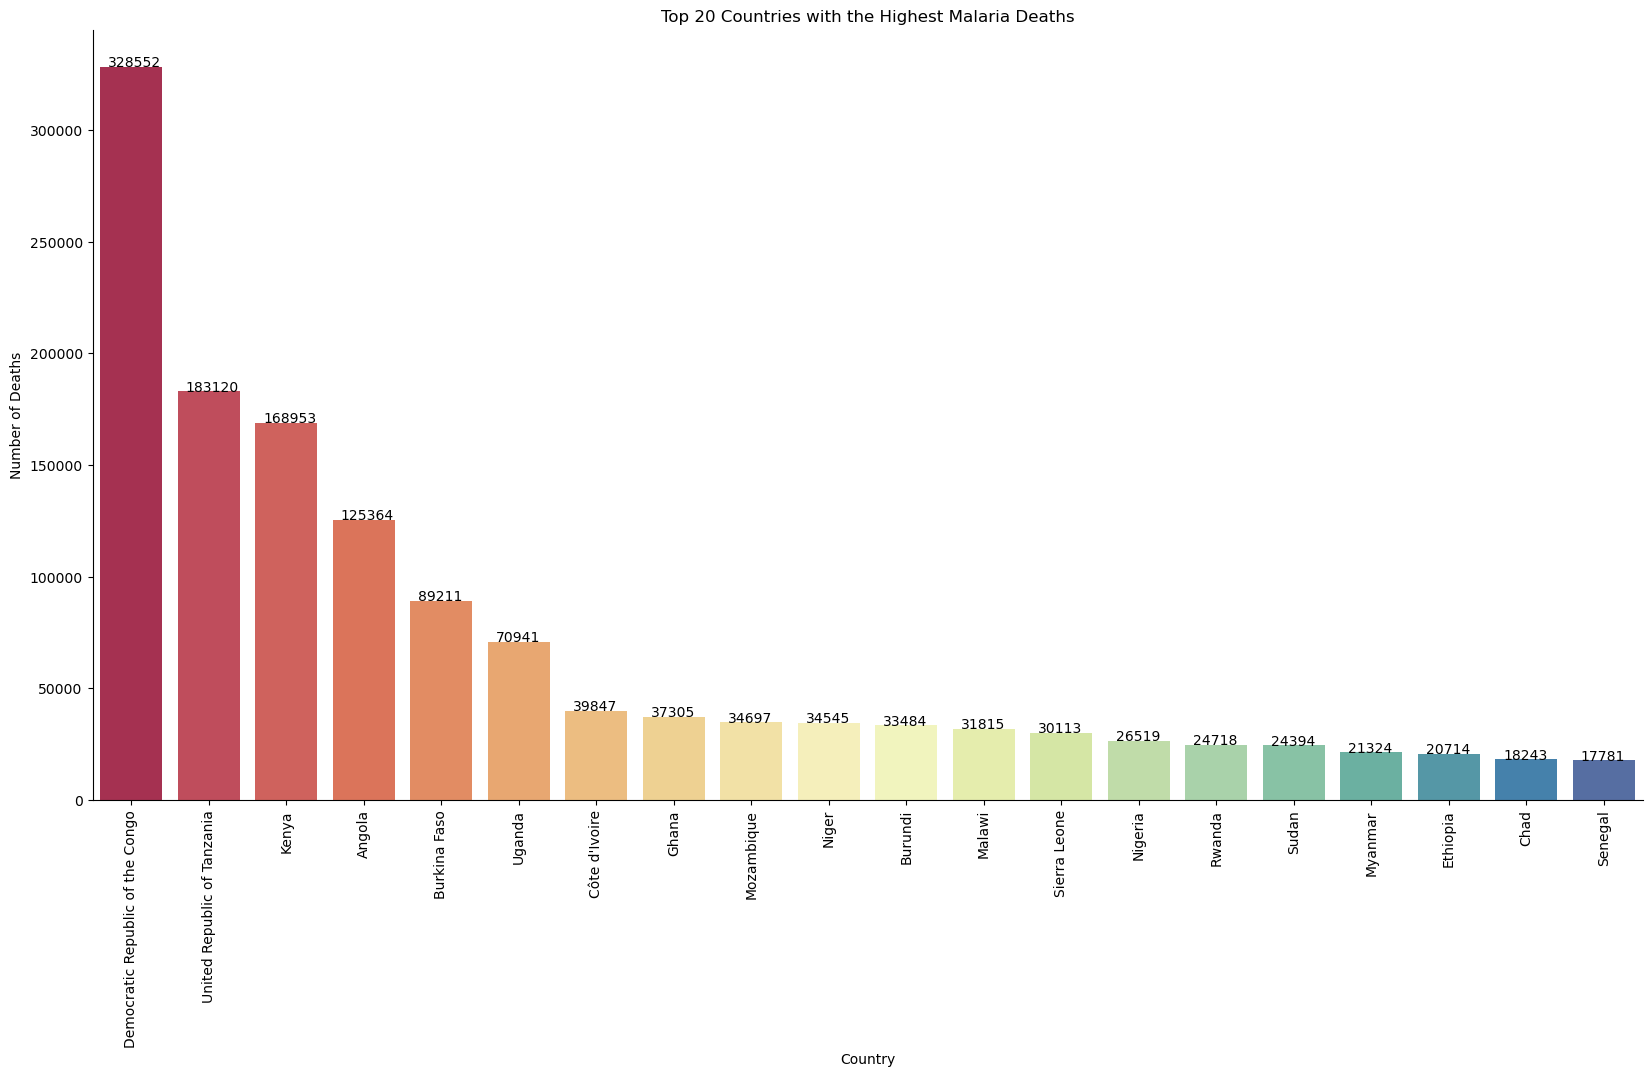

In [32]:
plt.figure(figsize = (20,10))
ax = sb.barplot(data=country_deaths[:20], x='Country', y='No. of deaths', palette='Spectral')
plt.title ('Top 20 Countries with the Highest Malaria Deaths')
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
data_label(ax,0.1,10)
plt.show()

From the visuals above, we can see the top 20 countries with the highest record of Malaria Cases and Deaths in the World from 2000 to 2017. The Democratic Republic of the Congo has the largest number of cases and deaths associated with Malaria, and most of the countries in the top 20 are African Countries.

In [33]:
year = df.groupby(['Year'])[['No. of cases', 'No. of deaths']].sum().reset_index()
year

,Year,No. of cases,No. of deaths
0,2000,5279182,21419
1,2001,5534764,26162
2,2002,5335247,70683
3,2003,8243454,91247
4,2004,9389638,87926
5,2005,11170319,76842
6,2006,11898896,78995
7,2007,13365529,76904
8,2008,13395349,87024
9,2009,17454477,115694


In [34]:
year_case = year[['Year', 'No. of cases']]
year_case

,Year,No. of cases
0,2000,5279182
1,2001,5534764
2,2002,5335247
3,2003,8243454
4,2004,9389638
5,2005,11170319
6,2006,11898896
7,2007,13365529
8,2008,13395349
9,2009,17454477


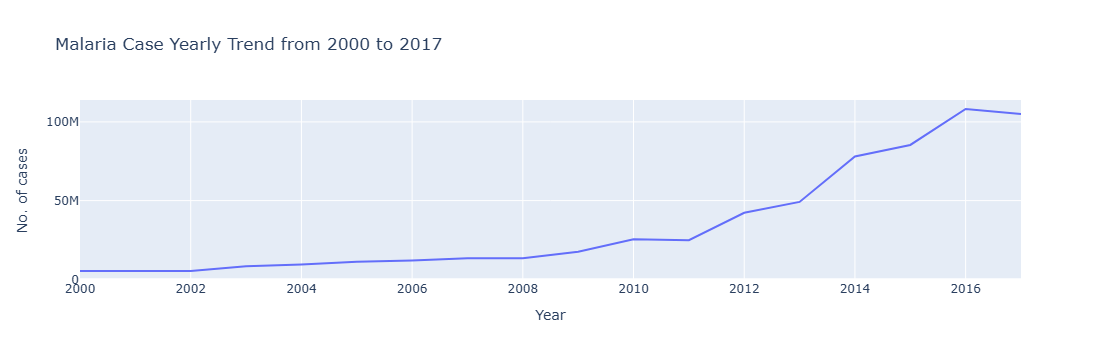

In [35]:
year_caseplot = plx.line(year_case, 
                         x='Year', 
                         y='No. of cases', 
                         title='Malaria Case Yearly Trend from 2000 to 2017')
year_caseplot.show()

From the chart above,
* There was a noticeable increase in the total number of reported Malaria Cases worldwide.
* Between the years of 2001 and 2002, there was a slight decrease in the total number of reported Malaria Cases, from 5,534,764 to 5,335,247 cases in the years respectively.

In [36]:
year_deaths = year[['Year', 'No. of deaths']]
year_deaths

,Year,No. of deaths
0,2000,21419
1,2001,26162
2,2002,70683
3,2003,91247
4,2004,87926
5,2005,76842
6,2006,78995
7,2007,76904
8,2008,87024
9,2009,115694


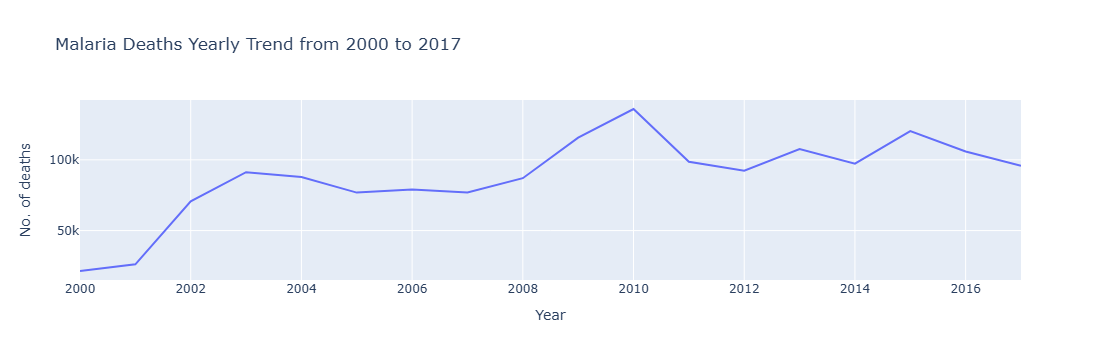

In [37]:
year_deathplot = plx.line(year_deaths, 
                         x='Year', 
                         y='No. of deaths', 
                         title='Malaria Deaths Yearly Trend from 2000 to 2017')
year_deathplot.show()

Unlike the yearly trend of reported malaria cases worldwide, the yearly death trend did not increase at a constant rate.
* The year with the highest record of deaths associated with Malaria was in 2010, with a record of 135,936 deaths.
* The year with the lowest record of deaths associated with Malaria was in 2000, having a record of 21,419 deaths.

### Malaria Case and Deaths in Nigeria

In [38]:
Nigeria = df[df['Country'] == 'Nigeria']
Nigeria

,Country,Year,No. of cases,No. of deaths,WHO Region,CFR
394,Nigeria,2014,7826954,6082,Africa,0.08
826,Nigeria,2010,551187,4238,Africa,0.77
934,Nigeria,2009,479845,7522,Africa,1.57
1042,Nigeria,2008,143079,8677,Africa,6.06


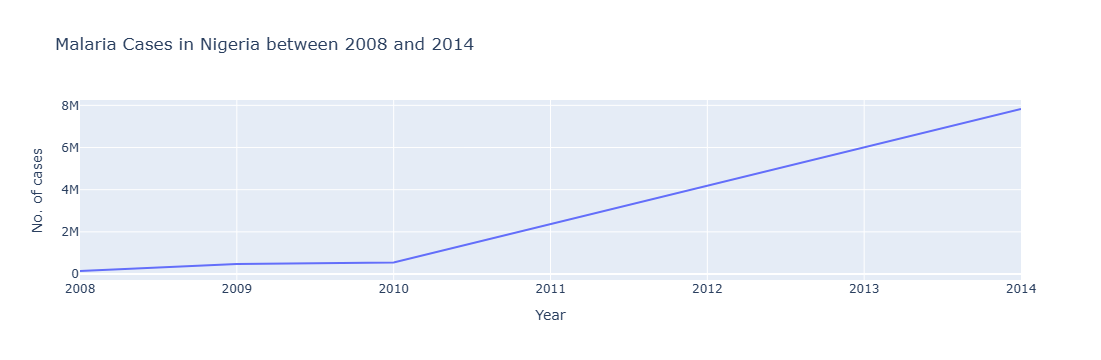

In [39]:
nigeria_caseplot = plx.line(Nigeria, 
                        x='Year', 
                        y='No. of cases', 
                        title='Malaria Cases in Nigeria between 2008 and 2014')
nigeria_caseplot.show()

From the visual above, Malaria cases in Nigeria has been constantly increasing, with a total of 7,826,954 reported cases in 2014.

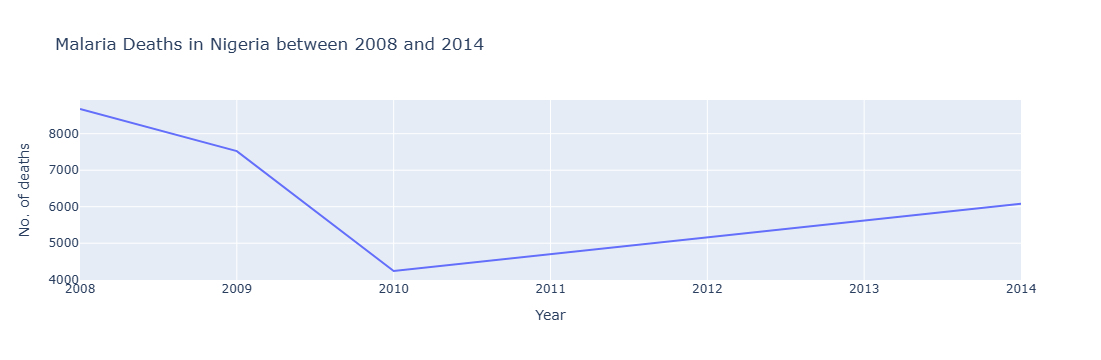

In [40]:
nigeria_deathplot = plx.line(Nigeria, 
                        x='Year', 
                        y='No. of deaths', 
                        title='Malaria Deaths in Nigeria between 2008 and 2014')
nigeria_deathplot.show()

From the graph above,
* The highest number of deaths associated with Malaria was recorded in 2008, having a total number of 8,677 deaths.
* The lowest number of deaths (4,238) was recorded in 2010.

### Correlation Analysis

In [41]:
Correlation_matrix = df['No. of cases'].corr(df['No. of deaths'])
print(f'Correlation Matrix : {Correlation_matrix:.3f}')

Correlation Matrix : 0.497


In [42]:
df[['Year', 'No. of cases', 'No. of deaths']].corr()

,Year,No. of cases,No. of deaths
Year,1.000000,0.251083,0.029845
No. of cases,0.251083,1.000000,0.496533
No. of deaths,0.029845,0.496533,1.000000


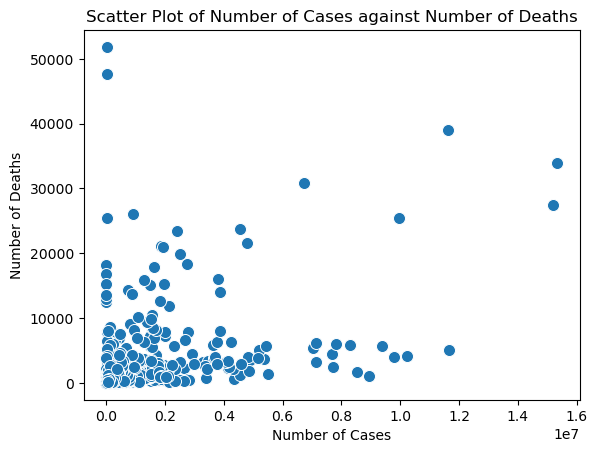

In [43]:
sb.scatterplot(data=df, x='No. of cases', y='No. of deaths', s=75)
plt.title('Scatter Plot of Number of Cases against Number of Deaths')
plt.xlabel('Number of Cases')
plt.ylabel('Number of Deaths')
plt.show()

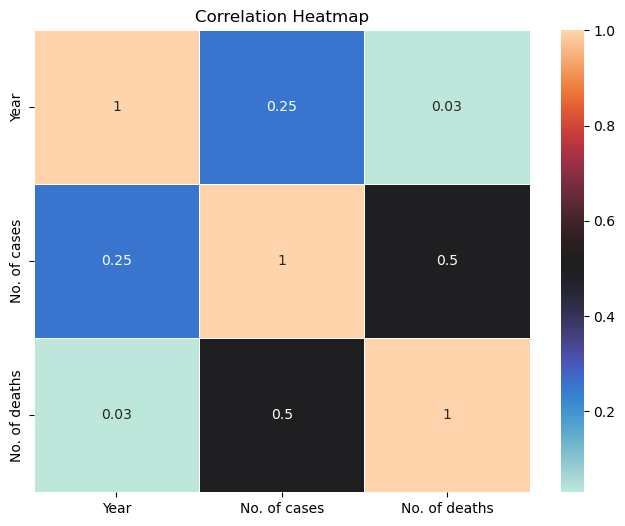

In [44]:
correlation_matrix = df[['Year', 'No. of cases', 'No. of deaths']].corr()

plt.figure(figsize=(8,6))
sb.heatmap(correlation_matrix, annot=True, cmap='icefire', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Insights.


##### Year vs No. of Cases (0.25)
* Correlation: 0.25 indicates a weak positive correlation.
* Interpretation: As the years progress, there is a slight tendency for the number of cases to increase, but the relationship is weak and likely not significant.

##### Year vs No. of Deaths (0.03)
* Correlation: 0.03 indicates no significant correlation.
* Interpretation: the number of deaths does not show any meaningful linear relationship with time (year). The values may fluctuate independently over time.

##### No. of Cases vs No. of Deaths
* Correlation: 0.5 indicates a moderate positive correlation.
* Interpretation: When the number of malaria cases increases, the number of deaths tends to increase as well, though the relationship is not particularly strong. This could suggest that some other factors influence the number of deaths in addition to the number of cases.

In [45]:
# df.to_csv('Malaria Data.csv')

## Predictive Modelling

In [46]:
# Let's import the necessary libraries.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Encoding dataset to make it fit for modelling

In [47]:
le = LabelEncoder()

In [48]:
df['Country'] = le.fit_transform(df['Country'])
df['WHO Region'] = le.fit_transform(df['WHO Region'])

df

,Country,Year,No. of cases,No. of deaths,WHO Region,CFR
0,0,2017,161778,10,2,0.01
1,1,2017,0,0,0,0.00
2,2,2017,3874892,13967,0,0.36
3,3,2017,0,1,1,0.00
6,6,2017,4893,13,4,0.27
...,...,...,...,...,...,...
1936,97,2000,17734,379,0,2.14
1937,98,2000,126,0,3,0.00
1938,99,2000,6768,3,5,0.04
1939,100,2000,29736,24,1,0.08


In [49]:
df.corr()

,Country,Year,No. of cases,No. of deaths,WHO Region,CFR
Country,1.000000,-0.016324,-0.025613,-0.037950,0.186179,0.028614
Year,-0.016324,1.000000,0.251083,0.029845,-0.085074,-0.009788
No. of cases,-0.025613,0.251083,1.000000,0.496533,-0.233321,-0.012686
No. of deaths,-0.037950,0.029845,0.496533,1.000000,-0.234820,0.154326
WHO Region,0.186179,-0.085074,-0.233321,-0.234820,1.000000,-0.033172
CFR,0.028614,-0.009788,-0.012686,0.154326,-0.033172,1.000000


### Defining Feature (x) and Target Variable (y)

In [50]:
x = df.drop(columns=['No. of deaths'])
y = df['No. of deaths']

### Spliting the data into training and testing sets

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [52]:
x_train

,Country,Year,No. of cases,WHO Region,CFR
69,67,2017,2638580,0,0.09
1493,87,2004,537899,2,0.34
1176,94,2007,313,3,0.32
180,70,2016,318449,2,0.01
584,44,2012,31656,1,0.11
...,...,...,...,...,...
1040,66,2008,762,1,0.00
1446,42,2004,103069,0,0.51
313,95,2015,0,3,0.00
532,97,2013,1551923,0,0.55


In [53]:
x_test

,Country,Year,No. of cases,WHO Region,CFR
1890,53,2000,40106,5,0.87
965,98,2009,0,3,0.00
1295,104,2006,19702,0,4.07
1933,95,2000,24,3,0.00
311,93,2015,1113927,0,0.11
...,...,...,...,...,...
530,96,2013,1502362,0,0.48
197,87,2016,575015,2,0.17
102,99,2017,1071,5,0.00
314,96,2015,7137662,0,0.09


### Scaling Features

I'll use StandardScaler to scale the features so as to ensure numerical features are on a similar scale, which helps the model converge more efficiently.

In [54]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Training Models

I'll begin training the models, making predictions, and also evaluating the models.

1. #### LinearRegression()

In [55]:
lr_model = LinearRegression()

In [56]:
lr_model.fit(x_train_scaled, y_train)

LinearRegression()

In [57]:
lr_predict = lr_model.predict(x_test_scaled)

In [58]:
lr_mse = mean_squared_error(y_test, lr_predict)
print('Mean Squared Error (mse) =', lr_mse)

Mean Squared Error (mse) = 4544180.523126322


In [59]:
lr_r2 = r2_score(y_test, lr_predict)
print('R2_Score (r2) =', lr_r2)

R2_Score (r2) = 0.31174018990961727


In [60]:
lr_mae = mean_absolute_error(y_test, lr_predict)
print('Mean Absolute Error (mae) =', lr_mae)

Mean Absolute Error (mae) = 1091.8585462716399


2. #### DecisionTreeRegressor

In [61]:
dtr_model = DecisionTreeRegressor()

In [62]:
dtr_model.fit(x_train_scaled, y_train)

DecisionTreeRegressor()

In [63]:
dtr_predict = dtr_model.predict(x_test_scaled)

In [64]:
dtr_mse = mean_squared_error(y_test, dtr_predict)
print('Mean Squared Error (mse) =', dtr_mse)

Mean Squared Error (mse) = 5907813.3054662375


In [65]:
dtr_r2 = r2_score(y_test, dtr_predict)
print('R2_Score (r2) =', dtr_r2)

R2_Score (r2) = 0.10520490042675246


In [66]:
dtr_mae = mean_absolute_error(y_test, dtr_predict)
print('Mean Absolute Error (mae) =', dtr_mae)

Mean Absolute Error (mae) = 399.85852090032154


3. #### RandomForestRegressor

In [67]:
rfr_model = RandomForestRegressor()

In [68]:
rfr_model.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [69]:
rfr_predict = rfr_model.predict(x_test_scaled)

In [70]:
rfr_mse = mean_squared_error(y_test, rfr_predict)
print('Mean Squared Error (mse) =', rfr_mse)

Mean Squared Error (mse) = 971794.9712546621


In [71]:
rfr_r2 = r2_score(y_test, rfr_predict)
print('R2_Score (r2) =', rfr_r2)

R2_Score (r2) = 0.8528123125922016


In [72]:
rfr_mae = mean_absolute_error(y_test, rfr_predict)
print('Mean Absolute Error (mae) =', rfr_mae)

Mean Absolute Error (mae) = 175.26045016077168
